In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# gsw oceanic toolbox: http://www.teos-10.org/pubs/Getting_Started.pdf
import gsw
from scipy.io import loadmat
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [35]:
HM_VMP_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/HM2015617/HM2015617_VMP.nc"
HM_VMP = xr.open_dataset(HM_VMP_nc)

In [26]:
HM_VMP["profile"] = HM_VMP["TIME"].count()

In [37]:
ds = HM_VMP
ds['profile'] = xr.DataArray(range(1,len(ds['TIME'])+1), dims='TIME')
ds = ds.swap_dims({'TIME': 'profile'})

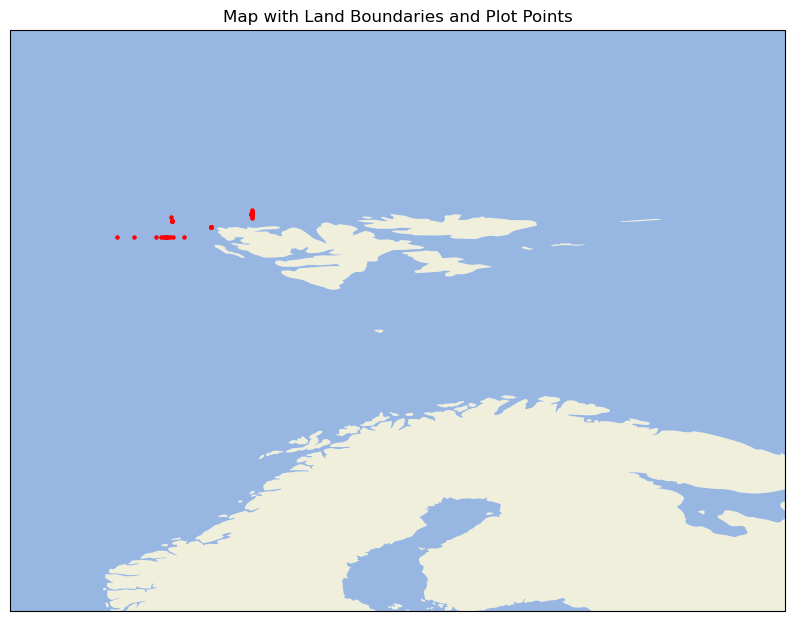

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(HM_VMP.LONGITUDE, HM_VMP.LATITUDE, transform=ccrs.PlateCarree(), color='red', s=5)

# Add land, ocean, and borders
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))

ax.set_extent([0, 40, 60, 90], crs=ccrs.PlateCarree())
ax.set_title("Map with Land Boundaries and Plot Points")
plt.show()

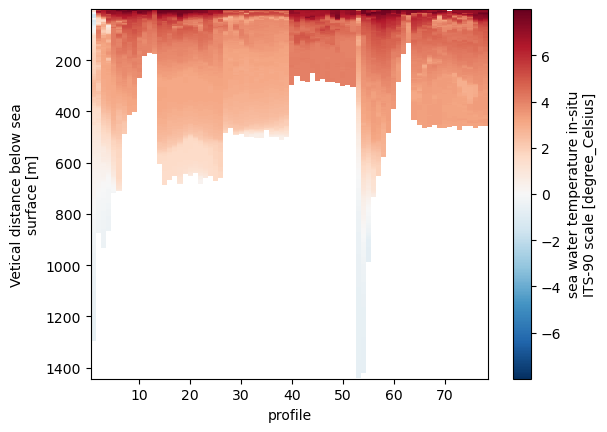

In [8]:
ds.TEMP.plot(y = "DEPTH", x = "profile")
plt.gca().invert_yaxis()

## Change variable names to fit general format

In [40]:
formatted_ds = ds.rename_vars({"TEMP": "T", "PSAL": "S", "HAB": "hab", "PRES":"P",
                               "LATITUDE": "latitude", "LONGITUDE": "longitude"})
formatted_ds = formatted_ds.rename({"TIME": "time", "DEPTH": "depth"})

In [41]:
# add an extra dimension for the gamma script in the processing steps
formatted_ds["P"] = formatted_ds.P.expand_dims(dim="new_axis")

In [42]:
formatted_ds.to_netcdf("/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/HM_ds.nc")